<a href="https://colab.research.google.com/github/miYo-0/Credit_Card_Fraud_Detection/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!unzip /content/drive/MyDrive/Dataset/creditcard.csv.zip

Archive:  /content/drive/MyDrive/Dataset/creditcard.csv.zip
  inflating: creditcard.csv          


#Anomaly Detection using Gaussian Distribution

In [3]:
# Importing the required libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import numpy as np
import random as rnd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from numpy import genfromtxt
from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score, average_precision_score
from sklearn.metrics import precision_score, precision_recall_curve
%matplotlib inline
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve


Lets get the dataframe for credit card transation data

In [4]:
# Load the credit card transaction data
train_df = pd.read_csv("/content/creditcard.csv")

**Explore the data**

In [5]:
train_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
train_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

we have ready to use dataframe with clean data.
In the overview of the data it has been mentioned that "Class" field in this dataframe consists binary data in 1 and zeros
1 for fraudulent transactions, 0 otherwise

In [8]:
# Checking the distribution of classes
print('No Frauds', round(train_df['Class'].value_counts()[0]/len(train_df) * 100, 2), '% of the dataset')
print('Frauds', round(train_df['Class'].value_counts()[1]/len(train_df) * 100, 2), '% of the dataset')


No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


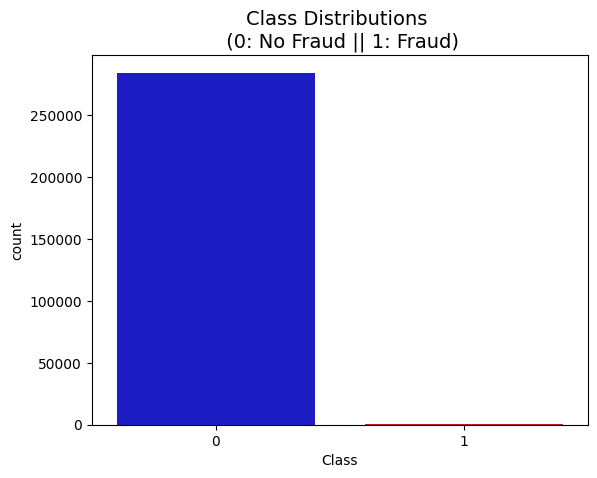

In [9]:
# Visualizing the class distributions
colors = ["#0101DF", "#DF0101"]
sns.countplot(x='Class', data=train_df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.show()


Fraudulent transactions provided here contributes mere 0.17% which indicates
we have a highly imbalanced data to work on.
If I can summarize what Andrew Ng has mentioned in his lecture on Anomaly detection is Supervised Classification technique is not the perfect candidate for highly imbalanced data. In this case it is 0.172% (near to 0)

If We think from the persepctive of building the model to find out the anomalous data which is not seen very frequently We should go for Anomaly detection technique using Gaussian Distribution.

##Visualize the features which not much of help in detecting the anomaly

In [10]:
v_features = train_df.iloc[:, 1:29].columns
v_features

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')

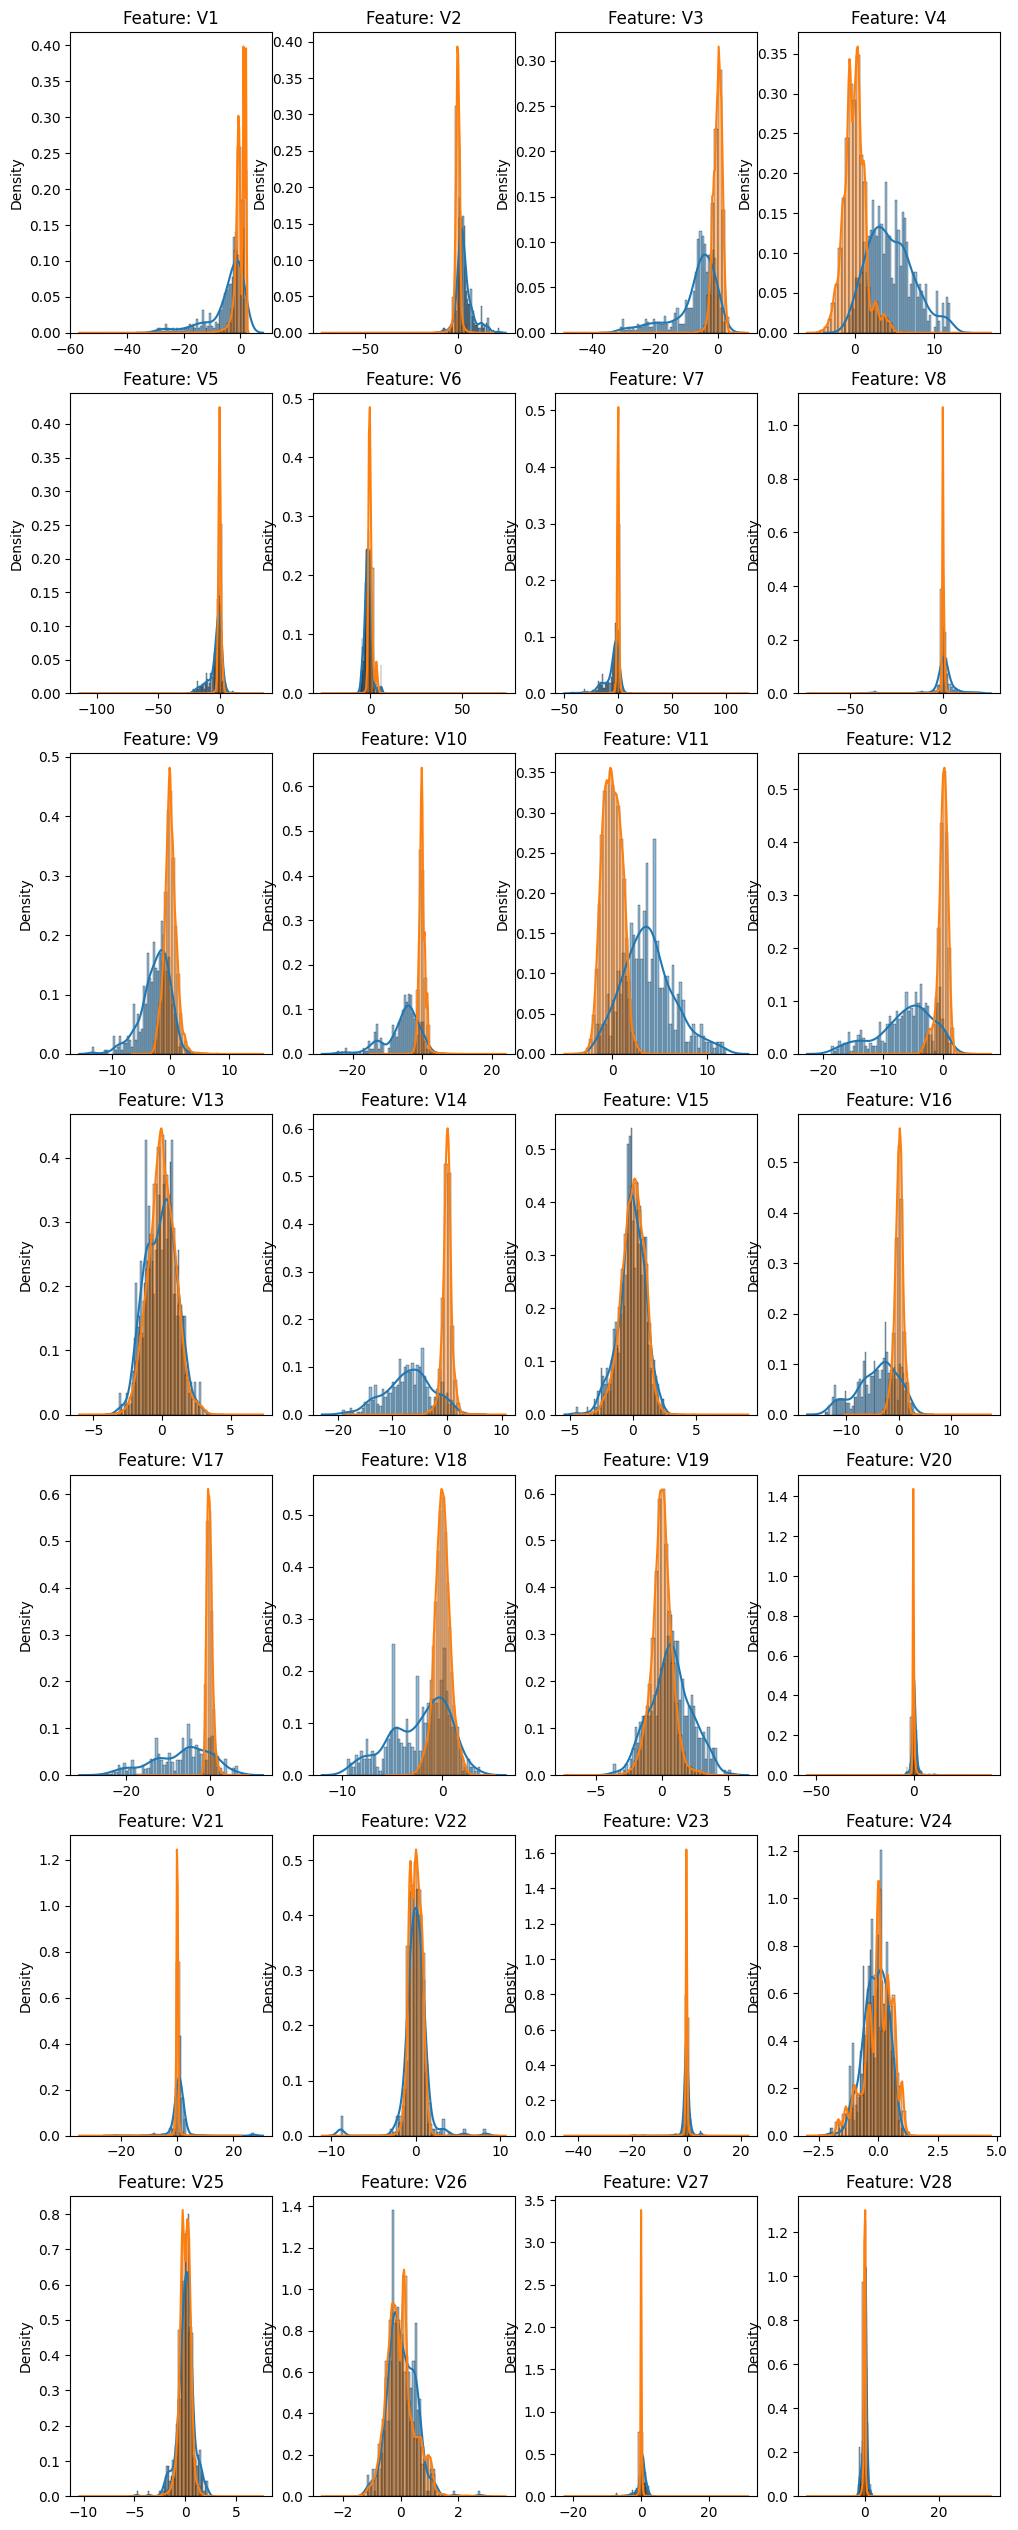

In [11]:
# Feature visualization for non-informative features
plt.figure(figsize=(12, 8*4))
gs = gridspec.GridSpec(7, 4)
for i, cn in enumerate(train_df[v_features]):
    ax = plt.subplot(gs[i])
    sns.histplot(train_df[cn][train_df.Class == 1], bins=50, kde=True, stat="density", kde_kws=dict(cut=3))
    sns.histplot(train_df[cn][train_df.Class == 0], bins=50, kde=True, stat="density", kde_kws=dict(cut=3))
    ax.set_xlabel('')
    ax.set_title('Feature: ' + str(cn))
plt.show()

**Feature importance**

Lets use Feature importance to get rid of unwanted features whose existance will not improve our prediction model.
I have used random forest classifier to identify the influential fetures. You can validate the below result with the feature analysis I conducted above.

In [12]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

train_df['scaled_amount'] = rob_scaler.fit_transform(train_df['Amount'].values.reshape(-1,1))
train_df['scaled_time'] = rob_scaler.fit_transform(train_df['Time'].values.reshape(-1,1))

# train_df.drop(['Time','Amount'], axis=1, inplace=True)
train_df.drop(['Amount'], axis=1, inplace=True)

In [13]:
scaled_amount = train_df['scaled_amount']
scaled_time = train_df['scaled_time']

train_df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
train_df.insert(1, 'scaled_amount', scaled_amount)
train_df.insert(2, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

train_df.head()

,Time,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,0.0,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,1.0,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.0,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,2.0,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [14]:
train_df.columns

Index(['Time', 'scaled_amount', 'scaled_time', 'V1', 'V2', 'V3', 'V4', 'V5',
       'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16',
       'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26',
       'V27', 'V28', 'Class'],
      dtype='object')

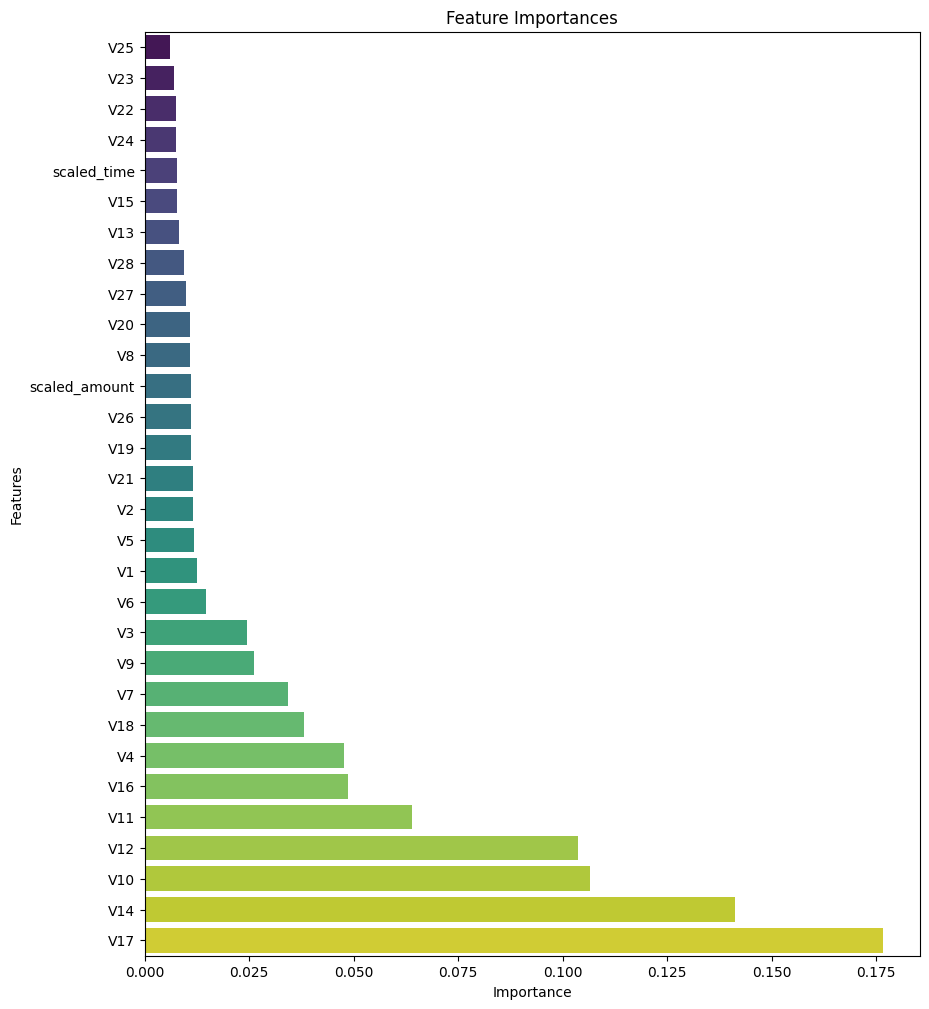

In [15]:
# Train a Random Forest Classifier
random_state = 0
n_estimators = 100
criterion = 'entropy'
rnd_clf = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion, random_state=random_state)
rnd_clf.fit(train_df.iloc[:, 1:31], train_df.iloc[:, 31])

# Get feature importances
importances = rnd_clf.feature_importances_
features = train_df.iloc[:, 1:31].columns

# Sort features by importances
sorted_indices = np.argsort(importances)
sorted_features = features[sorted_indices]
sorted_importances = importances[sorted_indices]

# Plot feature importances
plt.figure(figsize=(10, 12))
sns.barplot(x=sorted_importances, y=sorted_features, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


In [16]:
for name, importance in zip(train_df.iloc[:, 1:30].columns, rnd_clf.feature_importances_):
    if importance > 0.020:
        print('"' + name + '",')


"V3",
"V4",
"V7",
"V9",
"V10",
"V11",
"V12",
"V14",
"V16",
"V17",
"V18",


In [17]:
dropable_col = []
for name, importance in zip(train_df.iloc[:, 1:31].columns, rnd_clf.feature_importances_):
    if importance <= 0.020:
        dropable_col.append(name)
dropable_col.append('Time')
dropable_col


['scaled_amount',
 'scaled_time',
 'V1',
 'V2',
 'V5',
 'V6',
 'V8',
 'V13',
 'V15',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Time']

In [18]:
train_df.drop(dropable_col, axis = 1, inplace = True)

In [19]:
train_df.head()

,V3,V4,V7,V9,V10,V11,V12,V14,V16,V17,V18,Class
0,2.536347,1.378155,0.239599,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0
1,0.166480,0.448154,-0.078803,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,0
2,1.773209,0.379780,0.791461,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,0
3,1.792993,-0.863291,0.237609,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,0
4,1.548718,0.403034,0.592941,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0


Succesfully removed all the features which not much of help in detecting the anomaly

# Dataset partition

In [20]:
# Split the dataset into 2 part one with Class 1 and other with class 0
train_strip_v1 = train_df[train_df.Class == 1]
train_strip_v0 = train_df[train_df.Class == 0]

In [21]:
train_strip_v1

,V3,V4,V7,V9,V10,V11,V12,V14,V16,V17,V18,Class
541,-1.609851,3.997906,-2.537387,-2.770089,-2.772272,3.202033,-2.899907,-4.289254,-1.140747,-2.830056,-0.016822,1
623,1.088463,2.288644,0.325574,-0.270953,-0.838587,-0.414575,-0.503141,-1.692029,0.666780,0.599717,1.725321,1
4920,-0.359745,2.330243,0.562320,-0.238253,-1.525412,2.032912,-6.560124,-1.470102,-2.282194,-4.781831,-2.615665,1
6108,-2.592844,2.679787,-3.496197,-0.247768,-4.801637,4.895844,-10.912819,-6.771097,-7.358083,-12.598419,-5.131549,1
6329,-4.304597,4.732795,1.713445,-1.282858,-2.447469,2.101344,-4.609628,-6.079337,2.581851,6.739384,3.042493,1
...,...,...,...,...,...,...,...,...,...,...,...,...
279863,-4.518331,1.749293,-0.882850,-2.064945,-5.587794,2.115795,-5.417424,-6.665177,-2.897825,-4.570529,-1.315147,1
280143,-5.004247,1.411850,-1.413170,-1.127396,-3.232153,2.858466,-3.096915,-5.210141,-2.155297,-3.267116,-0.688505,1
280149,-2.213700,0.468308,-2.234739,-0.652250,-3.463891,1.794969,-2.775022,-4.057162,-1.603015,-5.035326,-0.507000,1
281144,-5.399730,1.817092,-2.208002,-1.632333,-5.245984,1.933520,-5.030465,-6.416628,-2.549498,-4.614717,-1.478138,1


In the Anomalized technique we distribute this large dataset into 3 parts .

1.   Normal Transactons: classified as 0 , no anomalized transaction should be present here since it is not a supervised method
How to get this dataset :- 60% of normal transactions should be added here.
Find out Epsilon by using min(Probability) command
2.   dataset for Cross validation : from the remaining normal transaction take 50 % (i.e. 20 % as a whole since we have already took the data in the first step) and add 50% of the Anomalized data with this .

3.   dataset for testing the algorithm :- this step is similar to what we did for Cross validattion.
Test dataset = leftover normal transaction + leftover Anomalized data





In summary, we create separate datasets for normal transactions, cross-validation, and testing. Each dataset serves a specific purpose in training, fine-tuning, and evaluating the anomaly detection algorithm.






In [22]:
# Calculate lengths of normal and anomalous transactions
normal_len = len(train_strip_v0)
anomalous_len = len(train_strip_v1)

# Split anomalous transactions for cross-validation and testing
start_mid = anomalous_len // 2
train_cv_v1 = train_strip_v1[:start_mid]
train_test_v1 = train_strip_v1[start_mid + 1:anomalous_len]

# Calculate indices for splitting normal transactions
start_mid = (normal_len * 60) // 100
cv_mid = (normal_len * 80) // 100

# Split normal transactions for train_fraud, train_cv, and train_test
train_fraud = train_strip_v0[:start_mid].copy()
train_cv = train_strip_v0[start_mid + 1:cv_mid].copy()
train_test = train_strip_v0[cv_mid + 1:normal_len].copy()

# Combine train_cv_v1 with train_cv
train_cv = pd.concat([train_cv, train_cv_v1], axis=0)

# Combine train_test_v1 with train_test
train_test = pd.concat([train_test, train_test_v1], axis=0)

# Extract target variable (Class) from train_cv and train_test
train_cv_y = train_cv["Class"]
train_test_y = train_test["Class"]

# Remove target variable (Class) from train_cv, train_fraud, and train_test
train_cv.drop(labels=["Class"], axis=1, inplace=True)
train_fraud.drop(labels=["Class"], axis=1, inplace=True)
train_test.drop(labels=["Class"], axis=1, inplace=True)

# Print column names of train_fraud, train_cv, and train_test
print(train_fraud.columns.values)
print(train_cv.columns.values)
print(train_test.columns.values)


['V3' 'V4' 'V7' 'V9' 'V10' 'V11' 'V12' 'V14' 'V16' 'V17' 'V18']
['V3' 'V4' 'V7' 'V9' 'V10' 'V11' 'V12' 'V14' 'V16' 'V17' 'V18']
['V3' 'V4' 'V7' 'V9' 'V10' 'V11' 'V12' 'V14' 'V16' 'V17' 'V18']


# Gaussian distribution

In [23]:
# Function to estimate mean and covariance matrix
def estimateGaussian(dataset):
    mu = np.mean(dataset, axis=0)
    sigma = np.cov(dataset.T)
    return mu, sigma

# Function to calculate the probability density function
def multivariateGaussian(dataset, mu, sigma):
    p = multivariate_normal(mean=mu, cov=sigma)
    return p.pdf(dataset)

### **Selecting the threshold epsilon ( 𝜖 )**

In [24]:
def selectThresholdByCV(p_cv,train_cv_y):
    best_epsilon = 0
    best_f1 = 0
    f = 0


    farray = []
    Recallarray = []
    Precisionarray = []

    epsilons = (0.0000e+00,1.0527717316e-80, 1.0527717316e-70,1.0527717316e-60, 1.0527717316e-50, 1.0527717316e-24)

    # step_size = (max(p_cv) - min(p_cv)) / 10
    # epsilons = np.arange(min(p_cv), max(p_cv))

    for epsilon in epsilons:
        predictions = (p_cv < epsilon)

        tp = np.sum((predictions == 1) & (train_cv_y == 1))
        fp = np.sum((predictions == 1) & (train_cv_y == 0))
        fn = np.sum((predictions == 0) & (train_cv_y == 1))

        Precision = tp/(tp + fp)
        Recall = tp / (tp + fn)

        f =(2 * Precision * Recall)/ (Precision + Recall)

        # f = f1_score(train_cv_y, predictions, average = "binary")
        # Recall = recall_score(train_cv_y, predictions, average = "binary")
        # Precision = precision_score(train_cv_y, predictions, average = "binary")

        farray.append(f)
        Recallarray.append(Recall)
        Precisionarray.append(Precision)
        print ('For below Epsilon')
        print(epsilon)
        print ('F1 score , Recall and Precision are as below')
        print ('Best F1 Score %f' %f)
        print ('Best Recall Score %f' %Recall)
        print ('Best Precision Score %f' %Precision)
        print ('-'*40)
        if f > best_f1:
            best_f1 = f
            best_recall = Recall
            best_precision = Precision
            best_epsilon = epsilon
    fig = plt.figure()
    ax = fig.add_axes([0.1, 0.5, 0.7, 0.3])
    #plt.subplot(3,1,1)
    plt.plot(farray ,"ro")
    plt.plot(farray)
    ax.set_xticks(range(len(epsilons)))  # Set the number of ticks to match the length of epsilons
    ax.set_xticklabels(epsilons,rotation = 60 ,fontsize = 'medium' )
    ax.set_ylim((0,1.0))
    ax.set_title('F1 score vs Epsilon value')
    ax.annotate('Best F1 Score', xy=(best_epsilon,best_f1), xytext=(best_epsilon,best_f1))
    plt.xlabel("Epsilon value")
    plt.ylabel("F1 Score")
    plt.show()
    fig = plt.figure()
    ax = fig.add_axes([0.1, 0.5, 0.9, 0.3])
    #plt.subplot(3,1,2)
    plt.plot(Recallarray ,"ro")
    plt.plot(Recallarray)
    ax.set_xticks(range(len(epsilons)))  # Set the number of ticks to match the length of epsilons
    ax.set_xticklabels(epsilons,rotation = 60 ,fontsize = 'medium' )
    ax.set_ylim((0,1.0))
    ax.set_title('Recall vs Epsilon value')
    ax.annotate('Best Recall Score', xy=(best_epsilon,best_recall), xytext=(best_epsilon,best_recall))
    plt.xlabel("Epsilon value")
    plt.ylabel("Recall Score")
    plt.show()
    fig = plt.figure()
    ax = fig.add_axes([0.1, 0.5, 0.9, 0.3])
    #plt.subplot(3,1,3)
    plt.plot(Precisionarray ,"ro")
    plt.plot(Precisionarray)
    ax.set_xticks(range(len(epsilons)))  # Set the number of ticks to match the length of epsilons
    ax.set_xticklabels(epsilons,rotation = 60 ,fontsize = 'medium' )
    ax.set_ylim((0,1.0))
    ax.set_title('Precision vs Epsilon value')
    ax.annotate('Best Precision Score', xy=(best_epsilon,best_precision), xytext=(best_epsilon,best_precision))
    plt.xlabel("Epsilon value")
    plt.ylabel("Precision Score")
    plt.show()
    return best_f1, best_epsilon

In [25]:
mu, sigma = estimateGaussian(train_fraud)
p = multivariateGaussian(train_fraud,mu,sigma)
p_cv = multivariateGaussian(train_cv,mu,sigma)
p_test = multivariateGaussian(train_test,mu,sigma)

<ipython-input-24-a37a2daaca58>:23: RuntimeWarning:

invalid value encountered in long_scalars



For below Epsilon
0.0
F1 score , Recall and Precision are as below
Best F1 Score nan
Best Recall Score 0.000000
Best Precision Score nan
----------------------------------------
For below Epsilon
1.0527717316e-80
F1 score , Recall and Precision are as below
Best F1 Score 0.813853
Best Recall Score 0.764228
Best Precision Score 0.870370
----------------------------------------
For below Epsilon
1.0527717316e-70
F1 score , Recall and Precision are as below
Best F1 Score 0.829474
Best Recall Score 0.800813
Best Precision Score 0.860262
----------------------------------------
For below Epsilon
1.0527717316e-60
F1 score , Recall and Precision are as below
Best F1 Score 0.817248
Best Recall Score 0.808943
Best Precision Score 0.825726
----------------------------------------
For below Epsilon
1.0527717316e-50
F1 score , Recall and Precision are as below
Best F1 Score 0.769811
Best Recall Score 0.829268
Best Precision Score 0.718310
----------------------------------------
For below Epsilon


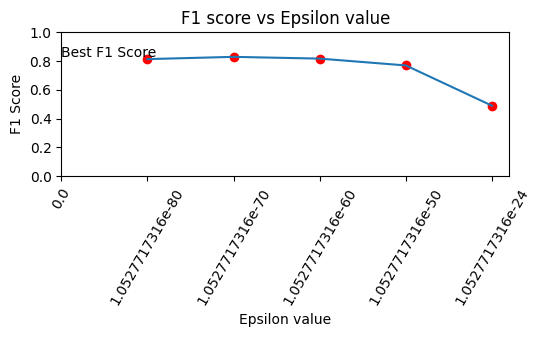

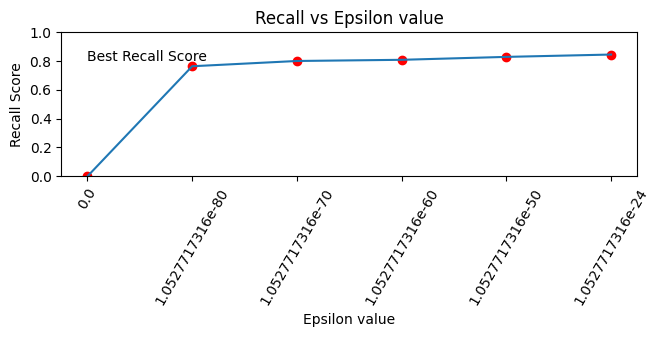

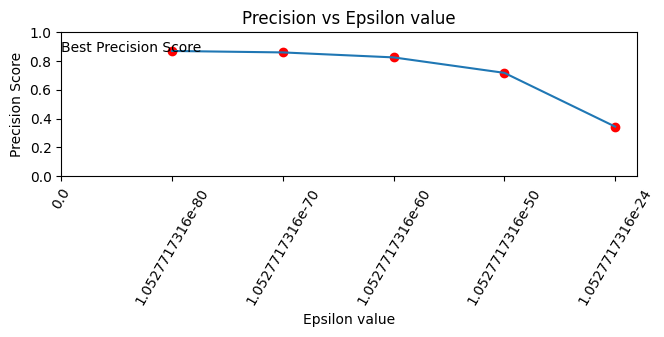

In [26]:
fscore, ep = selectThresholdByCV(p_cv, train_cv_y)

In [27]:
fscore

0.8294736842105263

In [28]:
ep


1.0527717316e-70

Epsilon value = 1.0527717316e-70 is selected as threshold to identify Anomalous transactions



### Prediction

now time to Predict and calculate F1 , Recall and Precision score for our Test Dataset

In [29]:
predictions = (p_test < ep)
Recall = recall_score(train_test_y, predictions, average = "binary")
Precision = precision_score(train_test_y, predictions, average = "binary")
F1score = f1_score(train_test_y, predictions, average = "binary")
print ('F1 score , Recall and Precision for Test dataset')
print ('Best F1 Score %f' %F1score)
print ('Best Recall Score %f' %Recall)
print ('Best Precision Score %f' %Precision)


F1 score , Recall and Precision for Test dataset
Best F1 Score 0.767816
Best Recall Score 0.681633
Best Precision Score 0.878947


In [30]:
print('# Anomalies found: %d'% sum(predictions))

# Anomalies found: 190


## Visualize our predictions in below scatter plot

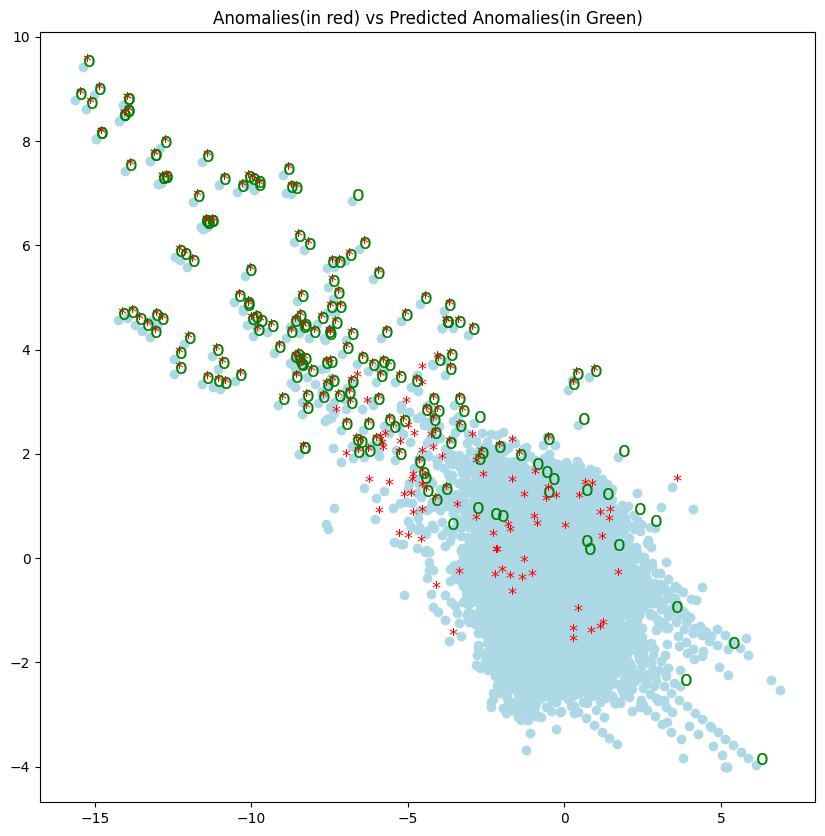

In [31]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(train_test['V14'],train_test['V11'],marker="o", color="lightBlue")
ax.set_title('Anomalies(in red) vs Predicted Anomalies(in Green)')
for i, txt in enumerate(train_test['V14'].index):
       if train_test_y.loc[txt] == 1 :
            ax.annotate('*', (train_test['V14'].loc[txt],train_test['V11'].loc[txt]),fontsize=13,color='Red')
       if predictions[i] == True :
            ax.annotate('o', (train_test['V14'].loc[txt],train_test['V11'].loc[txt]),fontsize=15,color='Green')

From the above result we can see that we are able to maintain the balance between Recall and Precision.

Precision of around 87% with Recall of 68% is not bad at all when we have such highly unbalanced data. These numbers are not fixed and can vary .

These numbers were different for Cross validation dataset and we shortlisted our Epsilon value by comparing the results of F1 Score.

I will show you the result we achieved on Cross validation dataset again.

In [32]:
predictions = (p_cv < ep)
Recall = recall_score(train_cv_y, predictions, average = "binary")
Precision = precision_score(train_cv_y, predictions, average = "binary")
F1score = f1_score(train_cv_y, predictions, average = "binary")
print ('F1 score , Recall and Precision for Cross Validation dataset')
print ('Best F1 Score %f' %F1score)
print ('Best Recall Score %f' %Recall)
print ('Best Precision Score %f' %Precision)

F1 score , Recall and Precision for Cross Validation dataset
Best F1 Score 0.829474
Best Recall Score 0.800813
Best Precision Score 0.860262


# Summary of above Algorithm:


*   Find Epsilon value by considering only Normal Transaction.


*   Use this Epsilon value on CV dataset (Normal transaction + Anomalous transaction)

*   Come up with set of Epsilon values to see how your algorithm performs and note down the Best F1 score along with Recall and Precision percentage
*   Choose the Epsilon value with highest F1 score

*   Use this Epsilon value to predict the Anomalous transaction on Test Dataset

